In [1]:
'1. Giới Thiệu'
'Sau đây là phần demo code nhằm miêu tả hiệu quả của các giải thuật tối ưu khác nhau'


'Sau đây là phần demo code nhằm miêu tả hiệu quả của các giải thuật tối ưu khác nhau'

In [2]:
'1. Import packages'

'1. Import packages'

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
sns.set(style = 'white', context = 'notebook', palette = 'deep')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD, Adagrad, Adam, Adadelta  
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
from math import pi
from math import cos
from math import floor
from keras.callbacks import Callback
from keras import backend
from numpy import argmax
from subprocess import check_output
from keras.layers import Convolution2D, MaxPooling2D
import keras
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.python.client import device_lib


Using TensorFlow backend.


In [4]:
tf.__version__


'2.1.0'

In [5]:
keras.__version__


'2.3.1'

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14874712746233037731
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6614579282
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12005166916073055896
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [7]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [8]:
'2. Load dữ liệu'

'2. Load dữ liệu'

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
'3. Khám phá dữ liêu'

'3. Khám phá dữ liêu'

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
print('Training shape: {}'.format(train.shape))


Training shape: (42000, 785)


In [13]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print('Test shape: {}'.format(test.shape))

Test shape: (28000, 784)


In [15]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
trainX = (train.iloc[:,1:].values).astype('float32')
trainY = (train.iloc[:, 0]).values.astype('float32')
testX = test.values.astype('float32')
#del train


In [17]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
trainY

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [19]:
Y = train['label']
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

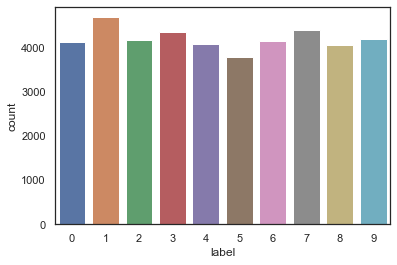

In [20]:
plot = sns.countplot(Y)



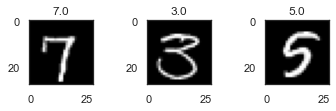

In [21]:
trainX = trainX.reshape(trainX.shape[0], 28, 28)
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.title(trainY[i])

In [22]:
'4. Tiền Xử lý dữ liệu'

'4. Tiền Xử lý dữ liệu'

In [23]:
trainX = trainX.reshape(-1,28,28,1)
trainX.shape

(42000, 28, 28, 1)

In [24]:
testX = testX.reshape(-1,28,28,1)
testX.shape

(28000, 28, 28, 1)

In [25]:
meanX = trainX.mean().astype(np.float32)
std_X = trainX.std().astype(np.float32)

In [26]:
def standardization(x):
    return (x-meanX)/std_X

In [27]:
trainY = to_categorical(trainY, num_classes = 10)
classes = trainY.shape[1]
classes

10

In [28]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.10, random_state=2)

In [29]:
trainX.shape

(37800, 28, 28, 1)

In [30]:
testX.shape


(4200, 28, 28, 1)

In [31]:
trainY.shape


(37800, 10)

In [32]:
testY.shape


(4200, 10)

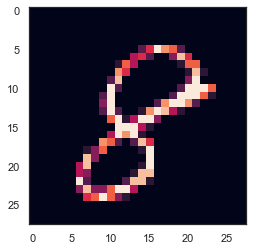

In [33]:
g = plt.imshow(trainX[0][:,:,0])


In [34]:
datagen = ImageDataGenerator(featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)


In [35]:
datagen.fit(trainX)


In [36]:
type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [37]:
trainX.shape

(37800, 28, 28, 1)

In [38]:
'5. Xây dựng model'

'5. Xây dựng model'

In [39]:
class ConvBlock(tf.keras.Model):
    def __init__(self, filters, kernel, strides, padding):
        '''
        Khởi tạo Convolution Block với các tham số đầu vào
        
        Parameters
        ----------
        filters: int
            số lượng filter
        kernel: int
            kích thước kernel
        strides: int
            stride của convolution layer
        padding: str
            Loại padding của convolution layer
        
        '''
        
        super(ConvBlock, self).__init__()
        # Tạo layer Conv2D
        self.cnn = tf.keras.layers.Conv2D(filters, kernel,  strides=strides,
                                          activation='relu',
                                          kernel_initializer='he_normal',
                                          kernel_regularizer=tf.keras.regularizers.l2(1e-3),
                                          padding=padding)

        # Tạo layer MaxPool2D
        self.pool = tf.keras.layers.MaxPool2D((2, 2))
        
        
    def call(self, inputs):
        '''
        Hàm này sẽ được gọi trong quá trình forwarding của mạng
        
        Parameters
        ----------
        inputs: tensor đầu vào
        
        Returns
        -------
        tensor
            giá trị đầu ra của mạng
        '''
        
        x = inputs
        
        x = self.cnn(x)
        x = self.pool(x)

        return x

In [40]:
class CNN(tf.keras.Model):
    def __init__(self, num_classes):
        
        super(CNN, self).__init__()
        
        self.block1 = ConvBlock(32, (5,5), (1, 1), 'same')
        self.block2 = ConvBlock(64, (3,3), (1, 1), 'same')
        
        self.flatten = tf.keras.layers.Flatten()
        
        self.dropout = tf.keras.layers.Dropout(.25)
        
        self.dense2 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')
                
        self.dense1 = tf.keras.layers.Dense(num_classes)
        

    def call(self, inputs):
        
        x = inputs
        
        x = self.block1(x)
        x = self.dropout(x)
        x = self.block2(x)
        x = self.dropout(x)
        
        x = self.flatten(x)
        x = self.dense2(x)
        x = self.dropout(x)
        x = self.dense1(x)
        
        output = tf.nn.softmax(x)

        return output

In [41]:
## Model parameters
num_classes = 10
epochs = 60 ## We keep it low for minimum training time. Increase if better performance is needed.
batch_size = 32
verbose = 2
step_per_epoch = trainX.shape[0] // batch_size
loss = 'categorical_crossentropy'
learning_rate = 0.1

In [42]:
model = CNN(num_classes)

In [43]:
Momentum_opti = tf.keras.optimizers.SGD(lr= learning_rate, momentum = 0.9, nesterov = False)


In [44]:
Adagrad_opti = tf.keras.optimizers.Adagrad(lr = learning_rate)

In [45]:
Adadelta_opti = tf.keras.optimizers.Adadelta(lr = learning_rate, rho = 0.9)

In [46]:
RMSProp_opti = tf.keras.optimizers.RMSprop(lr = learning_rate, rho = 0.9)


In [47]:
Adam_opti = tf.keras.optimizers.Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

In [48]:
"Train model using SGD"

'Train model using SGD'

In [49]:
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [50]:
mcp = tf.keras.callbacks.ModelCheckpoint("model_CNN_SGD.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [51]:
model.compile(optimizer = Adagrad_opti, loss = loss, metrics = ["accuracy"])


In [52]:
## Training Time!
device = '/GPU:0' if len(get_available_gpus()) > 0 else '/CPU:0'
with tf.device(device):
    history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Train for 1181 steps, validate on 4200 samples
Epoch 1/60
1181/1181 - 9s - loss: 214.6327 - accuracy: 0.2355 - val_loss: 2.3989 - val_accuracy: 0.3400
Epoch 2/60
1181/1181 - 7s - loss: 2.3989 - accuracy: 0.3330 - val_loss: 1.9768 - val_accuracy: 0.5143
Epoch 3/60
1181/1181 - 7s - loss: 2.1665 - accuracy: 0.4015 - val_loss: 1.6648 - val_accuracy: 0.5993
Epoch 4/60
1181/1181 - 7s - loss: 2.0163 - accuracy: 0.4493 - val_loss: 1.5206 - val_accuracy: 0.6436
Epoch 5/60
1181/1181 - 7s - loss: 1.8922 - accuracy: 0.4893 - val_loss: 1.3964 - val_accuracy: 0.6681
Epoch 6/60
1181/1181 - 7s - loss: 1.7823 - accuracy: 0.5302 - val_loss: 1.2246 - val_accuracy: 0.7231
Epoch 7/60
1181/1181 - 7s - loss: 1.6555 - accuracy: 0.5670 - val_loss: 1.1230 - val_accuracy: 0.7533
Epoch 8/60
1181/1181 - 7s - loss: 1.5486 - accuracy: 0.5981 - val_loss: 1.0332 - val_accuracy: 0.7836
Epoch 9/60
1181/1181 - 7s - loss: 1.4755 - accuracy: 0.6261

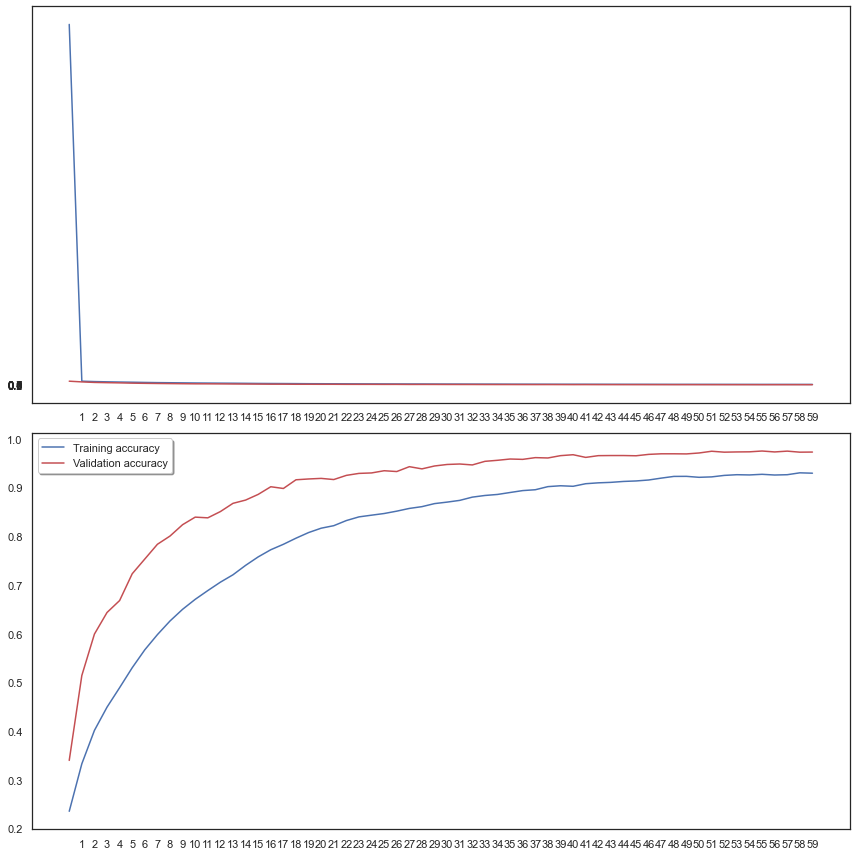

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()